<a href="https://colab.research.google.com/github/anandusateeshNSUT/isl-cnn/blob/main/ISL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import utils, callbacks
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from glob import glob
import sklearn
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
dataset_url = "https://www.kaggle.com/datasets/prathumarikeri/indian-sign-language-isl/"
od.download(dataset_url)


Skipping, found downloaded files in "./indian-sign-language-isl" (use force=True to force download)


In [24]:
train_folder = '/content/indian-sign-language-isl/Indian'

In [25]:
def load_images():
    images = []
    labels = []
    index = -1
    folders = sorted(os.listdir(train_folder))
    
    for folder in folders:
        index += 1
      
        print("Loading images from folder ", folder ," has started.")
        for image in os.listdir(train_folder + '/' + folder):
            img = cv2.imread(train_folder + '/' + folder + '/' + image, 0)
            img = edge_detection(img)
            img = cv2.resize(img, (64, 64))
            img = img_to_array(img)
            images.append(img)
            labels.append(index)

    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = to_categorical(labels)

    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

    return x_train, x_test, y_train, y_test
    
def edge_detection(image):
    minValue = 70
    blur = cv2.GaussianBlur(image,(5,5),2)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return res

In [26]:
x_train, x_test, y_train, y_test = load_images()

Loading images from folder  1  has started.
Loading images from folder  2  has started.
Loading images from folder  3  has started.
Loading images from folder  4  has started.
Loading images from folder  5  has started.
Loading images from folder  6  has started.
Loading images from folder  7  has started.
Loading images from folder  8  has started.
Loading images from folder  9  has started.
Loading images from folder  A  has started.
Loading images from folder  B  has started.
Loading images from folder  C  has started.
Loading images from folder  D  has started.
Loading images from folder  E  has started.
Loading images from folder  F  has started.
Loading images from folder  G  has started.
Loading images from folder  H  has started.
Loading images from folder  I  has started.
Loading images from folder  J  has started.
Loading images from folder  K  has started.
Loading images from folder  L  has started.
Loading images from folder  M  has started.
Loading images from folder  N  h

In [27]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train, random_state=17)
x_test, y_test = shuffle(x_test, y_test, random_state=17)

In [28]:
#print ("x_train: ", x_train)
#print ("y_train: ", y_train)
#print ("x_test: ", x_test)
#print ("y_test: ", y_test)

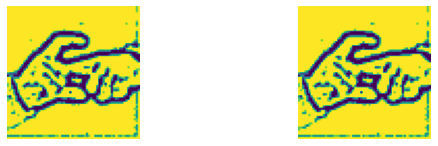

In [29]:
alpha = [chr(c) for c in range(65,91)]
un,count = np.unique(y_train,return_counts=True)
j=1
plt.figure(figsize=(20,20))
for i in un:
    plt.subplot(7,4,j)
    plt.imshow(x_train[np.where(y_train == np.array(i))[0][0]])
    plt.axis('off')
    j=j+1

In [30]:
map_characters = {0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: 'A', 10: 'B', 11: 'C', 12: 'D',
                  13: 'E', 14: 'F', 15: 'G', 16: 'H', 17: 'I', 18: 'J', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P',
                  25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'W', 32: 'X', 33: 'Y', 34: 'Z'}

In [31]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(35, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        

In [32]:
classes = 35
epochs = 10
learning_rate = 0.0001

adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1203/1203 [==============================] - 10s 7ms/step - loss: 0.1423 - accuracy: 0.9623 - val_loss: 5.9676e-04 - val_accuracy: 0.9998
Epoch 2/10
1203/1203 [==============================] - 12s 10ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 7.6801e-05 - val_accuracy: 1.0000
Epoch 3/10
1203/1203 [==============================] - 13s 11ms/step - loss: 5.7530e-04 - accuracy: 0.9998 - val_loss: 3.9978e-05 - val_accuracy: 1.0000
Epoch 4/10
1203/1203 [==============================] - 8s 7ms/step - loss: 4.6617e-06 - accuracy: 1.0000 - val_loss: 9.8989e-06 - val_accuracy: 1.0000
Epoch 5/10
1203/1203 [==============================] - 7s 6ms/step - loss: 1.5214e-06 - accuracy: 1.0000 - val_loss: 1.0180e-05 - val_accuracy: 1.0000
Epoch 6/10
1203/1203 [==============================] - 7s 6ms/step - loss: 7.0482e-07 - accuracy: 1.0000 - val_loss: 8.4800e-06 - val_accuracy: 1.0000
Epoch 7/10
1203/1203 [==============================] - 7s 6ms/step - loss: 3.7764e-07 - ac

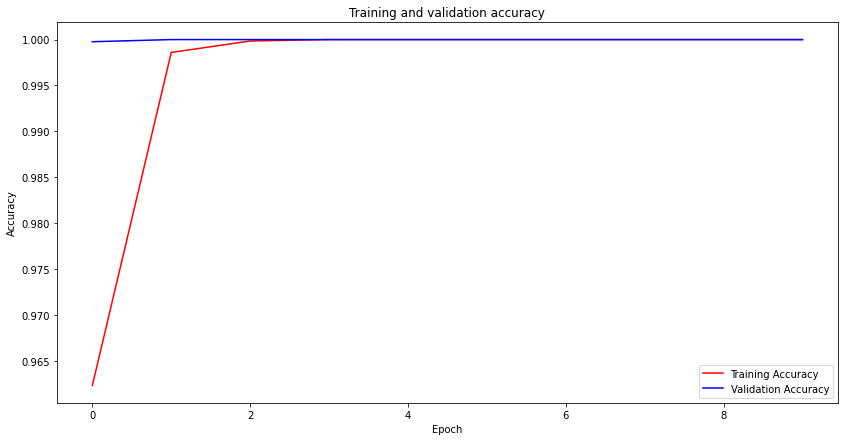

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

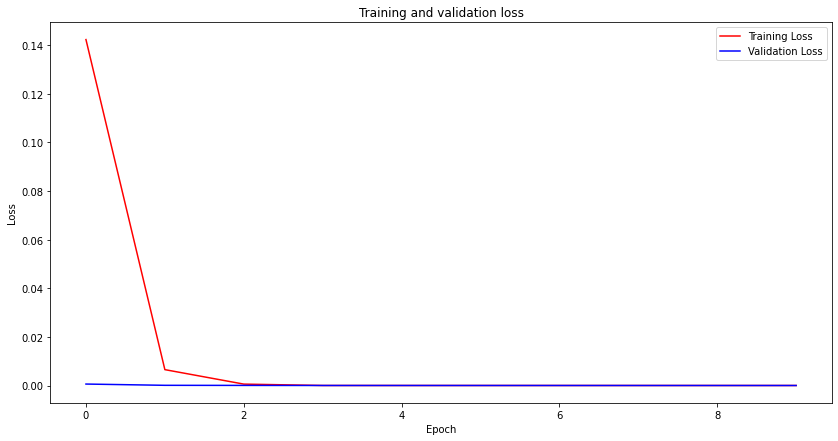

In [34]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [35]:
class_labels = list(map_characters.values())
print(class_labels)

['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [36]:
score = model.evaluate(x_test,y_test, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')

y_pred = model.predict(x_test, verbose = 1)
#print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values())), sep='') 
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
report = metrics.classification_report(Y_true, Y_pred_classes, target_names=class_labels)
print(report)


Keras CNN - accuracy: 1.0 

134/134 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00       127
           3       1.00      1.00      1.00       130
           4       1.00      1.00      1.00       111
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       104
           7       1.00      1.00      1.00       113
           8       1.00      1.00      1.00       123
           9       1.00      1.00      1.00       129
           A       1.00      1.00      1.00       114
           B       1.00      1.00      1.00        97
           C       1.00      1.00      1.00       148
           D       1.00      1.00      1.00       127
           E       1.00      1.00      1.00       131
           F       1.00      1.00      1.00       114
           G       1.00      1.00      1.00       1

In [38]:
confusion = metrics.confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[122   0   0 ...   0   0   0]
 [  0 127   0 ...   0   0   0]
 [  0   0 130 ...   0   0   0]
 ...
 [  0   0   0 ... 118   0   0]
 [  0   0   0 ...   0 109   0]
 [  0   0   0 ...   0   0 115]]


In [39]:
model.save('/content/ihsr/')

In [40]:
from keras.models import model_from_json
json_model = model.to_json()

with open('CNNThresholdISL.json', 'w') as json_file:
    json_file.write(json_model)